In [22]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LS
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [23]:
data=pd.read_csv("C:/Users/venky kishore/Downloads/TaxiFare.csv")
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [25]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [26]:
data.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [27]:
data.shape

(50000, 8)

In [28]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [29]:
data.unique_id.value_counts()

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
56:16.0      1
40:52.0      1
53:10.0      1
15:21.0      1
53:22.0      1
Name: unique_id, Length: 3597, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xe360bdd00>,
 'caps': [<matplotlib.lines.Line2D at 0xe360ca460>,
 'boxes': [<matplotlib.lines.Line2D at 0xe360bd970>],
 'medians': [<matplotlib.lines.Line2D at 0xe360cab80>],
 'fliers': [<matplotlib.lines.Line2D at 0xe360caf10>],
 'means': []}

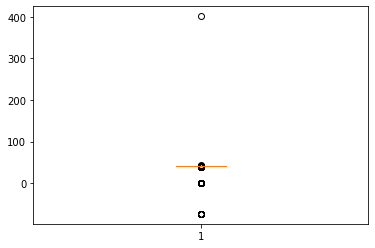

In [30]:
plt.boxplot(data.latitude_of_pickup)

{'whiskers': [<matplotlib.lines.Line2D at 0xe3610f220>,
 'caps': [<matplotlib.lines.Line2D at 0xe3610f940>,
 'boxes': [<matplotlib.lines.Line2D at 0xe36104e50>],
 'medians': [<matplotlib.lines.Line2D at 0xe361170a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe36117460>],
 'means': []}

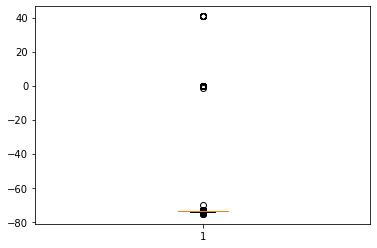

In [31]:
plt.boxplot(data.longitude_of_pickup)


In [37]:
plt.boxplot(data.longitude_of_dropoff

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_10360/3282810588.py, line 1)

In [33]:
Y=data.amount 

In [34]:
X=data.drop(["unique_id","amount","date_time_of_pickup"],axis=1)

In [35]:
X.shape

(50000, 5)

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_data=scaler.transform(X)

In [40]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4
0,0.013592,0.241487,0.086153,0.976981,0.166667
1,0.012115,0.241466,0.085056,0.977575,0.166667
2,0.012401,0.241571,0.084961,0.977307,0.333333
3,0.012363,0.241512,0.084958,0.977371,0.166667
4,0.012527,0.241585,0.085236,0.977590,0.166667


In [41]:
x_train,x_test,y_train,y_test= train_test_split(X1,Y,train_size = 0.8, test_size = 0.2,random_state =100)

In [43]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

MemoryError: Unable to allocate 14.8 GiB for an array with shape (49560, 40000) and data type float64

In [ ]:
model2.score(x_train,y_train)
model2.score(x_test,y_test)